In [2]:
# modules import
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
from metpy.interpolate import cross_section
import gsw
import cmocean

In [3]:
general_path='/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/density'

## undercurrent velocity 
# coordinate of profil
lat1 = -71.8
lat2 = -71.1
lon1 = -115.5
lon2 = -115.5
start = (lat1, lon1)
end = (lat2, lon2)
alpha = np.arctan((lon1 - lon2) / (lat1 - lat2))

# Temperature
netCDF_NEMO_file = f"{general_path}/density_profil_time_TT.nc"
DEN = xr.open_mfdataset(netCDF_NEMO_file)
DEN['x']= DEN['x'] - DEN['x'] + DEN['lon'][0,:].values
DEN['y']= DEN['y'] - DEN['y'] + DEN['lat'][:,0].values
DEN01 = DEN.rename_dims({'y': 'latitude', 'x' : 'longitude'})
DEN01 = DEN01.rename({'y': 'latitude', 'x' : 'longitude'})
DEN01['vitu'] = DEN01['Temp'] - DEN01['Temp'] + DEN01['vitu'].values
DEN01['vitv'] = DEN01['Temp'] - DEN01['Temp'] + DEN01['vitv'].values
if np.tan(alpha)<0:
    DEN01['vit_ortho'] = DEN01['vitu'] * np.cos(alpha) - DEN01['vitv'] * np.sin(alpha)
else:
    DEN01['vit_ortho'] = DEN01['vitu'] * np.cos(alpha) + DEN01['vitv'] * np.sin(alpha)
DEN01 = DEN01.where(DEN01.Sal != 0)
DEN01 = DEN01.metpy.parse_cf().squeeze()
    
cross1T = cross_section(DEN01, start, end).set_coords(('latitude', 'longitude'))
cross1T_sel = cross1T.vit_ortho.where(((cross1T.latitude<-71.43) & (cross1T.latitude>-71.5)) & ((cross1T.depth>420) & (cross1T.depth<640))).mean(['index', 'depth'])

# Precipitation
netCDF_NEMO_file = f"{general_path}/density_profil_time_PT.nc"
DEN = xr.open_mfdataset(netCDF_NEMO_file)
DEN['x']= DEN['x'] - DEN['x'] + DEN['lon'][0,:].values
DEN['y']= DEN['y'] - DEN['y'] + DEN['lat'][:,0].values
DEN01 = DEN.rename_dims({'y': 'latitude', 'x' : 'longitude'})
DEN01 = DEN01.rename({'y': 'latitude', 'x' : 'longitude'})
DEN01['vitu'] = DEN01['Temp'] - DEN01['Temp'] + DEN01['vitu'].values
DEN01['vitv'] = DEN01['Temp'] - DEN01['Temp'] + DEN01['vitv'].values
if np.tan(alpha)<0:
    DEN01['vit_ortho'] = DEN01['vitu'] * np.cos(alpha) - DEN01['vitv'] * np.sin(alpha)
else:
    DEN01['vit_ortho'] = DEN01['vitu'] * np.cos(alpha) + DEN01['vitv'] * np.sin(alpha)
DEN01 = DEN01.where(DEN01.Sal != 0)
DEN01 = DEN01.metpy.parse_cf().squeeze()
    
cross1P = cross_section(DEN01, start, end).set_coords(('latitude', 'longitude'))
cross1P_sel = cross1P.vit_ortho.where(((cross1P.latitude<-71.43) & (cross1P.latitude>-71.5)) & ((cross1P.depth>420) & (cross1P.depth<640))).mean(['index', 'depth'])

# Wind
netCDF_NEMO_file = f"{general_path}/density_profil_time_WT.nc"
DEN = xr.open_mfdataset(netCDF_NEMO_file)
DEN['x']= DEN['x'] - DEN['x'] + DEN['lon'][0,:].values
DEN['y']= DEN['y'] - DEN['y'] + DEN['lat'][:,0].values
DEN01 = DEN.rename_dims({'y': 'latitude', 'x' : 'longitude'})
DEN01 = DEN01.rename({'y': 'latitude', 'x' : 'longitude'})
DEN01['vitu'] = DEN01['Temp'] - DEN01['Temp'] + DEN01['vitu'].values
DEN01['vitv'] = DEN01['Temp'] - DEN01['Temp'] + DEN01['vitv'].values
if np.tan(alpha)<0:
    DEN01['vit_ortho'] = DEN01['vitu'] * np.cos(alpha) - DEN01['vitv'] * np.sin(alpha)
else:
    DEN01['vit_ortho'] = DEN01['vitu'] * np.cos(alpha) + DEN01['vitv'] * np.sin(alpha)
DEN01 = DEN01.where(DEN01.Sal != 0)
DEN01 = DEN01.metpy.parse_cf().squeeze()
    
cross1W = cross_section(DEN01, start, end).set_coords(('latitude', 'longitude'))
cross1W_sel = cross1W.vit_ortho.where(((cross1W.latitude<-71.43) & (cross1W.latitude>-71.5)) & ((cross1W.depth>420) & (cross1W.depth<640))).mean(['index', 'depth'])
cross1W_sel0 = cross1W_sel.drop_sel(num=['REFERENCE'])


# Buoyancy flux
netCDF_NEMO_fileT = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/NETCDF_fluxes_TEMP.nc'
netCDF_NEMO_fileP = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/NETCDF_fluxes_PREC.nc'
netCDF_NEMO_fileW = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/NETCDF_fluxes_WIND.nc'

FLXT = xr.open_mfdataset(netCDF_NEMO_fileT)
FLXT['year']= FLXT.time.dt.year
FLXT_mean = FLXT.where(FLXT.year > 1988).mean('time')
FLXT_mean['Buoyancy'] = - 9.81/3974 * FLXT_mean['alpha'] * FLXT_mean['hfxout'] + 9.81 * FLXT_mean['beta'] * (FLXT_mean['empmr']) * FLXT_mean['S_surface']

FLXP = xr.open_mfdataset(netCDF_NEMO_fileP)
FLXP['year']= FLXP.time.dt.year
FLXP_mean = FLXP.where(FLXP.year > 1988).mean('time')
FLXP_mean['Buoyancy'] = - 9.81/3974 * FLXP_mean['alpha'] * FLXP_mean['hfxout'] + 9.81 * FLXP_mean['beta'] * (FLXP_mean['empmr']) * FLXP_mean['S_surface'] 

FLXW = xr.open_mfdataset(netCDF_NEMO_fileW)
FLXW['year']= FLXW.time.dt.year
FLXW_mean = FLXW.where(FLXW.year > 1988).mean('time')
FLXW_mean['Buoyancy'] = - 9.81/3974 * FLXW_mean['alpha'] * FLXW_mean['hfxout'] + 9.81 * FLXW_mean['beta'] * (FLXW_mean['empmr']) * FLXW_mean['S_surface'] 

## Surface of iceshelves
S = 58957422607.36465

## Melt rate
netCDF_NEMO_MELTW_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_totale/NETCDF_MELT_MEAN_WIND.nc'
netCDF_NEMO_MELTP_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_totale/NETCDF_MELT_MEAN_PREC.nc'
netCDF_NEMO_MELTT_file = '/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/NETCDF/fonte_totale/NETCDF_MELT_MEAN_TEMP.nc'

MeltW = xr.open_mfdataset(netCDF_NEMO_MELTW_file)
MeltT = xr.open_mfdataset(netCDF_NEMO_MELTT_file)
MeltP = xr.open_mfdataset(netCDF_NEMO_MELTP_file)

MeltW_tp = MeltW.where(MeltW.time.dt.year >= 1988).mean('time') * 10**12 / 1000 / S
MeltT_tp = MeltT.where(MeltT.time.dt.year >= 1988).mean('time') * 10**12 / 1000 / S
MeltP_tp = MeltP.where(MeltP.time.dt.year >= 1988).mean('time') * 10**12 / 1000 / S

Mref = np.array([MeltT_tp.melt_mean[5], MeltT_tp.melt_mean[5]])

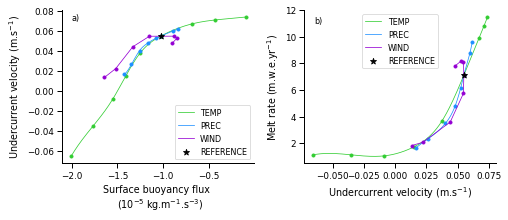

In [4]:
sns.set_context('paper')

# colormap
color_TEMP = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'limegreen', 'darkgreen']
color_PREC = ['darkblue', 'royalblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'darkgreen']
color_WIND = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'lightgreen', 'limegreen', 'darkgreen']
color_WINDT = ['darkblue', 'dodgerblue', 'lightskyblue', 'lightblue', 'black', 'lightgreen', 'limegreen', 'darkgreen']

# smooth line
xT = np.array(-FLXT_mean.Buoyancy)
yT = np.array(cross1T_sel)
xT_new = np.linspace(xT.min(), xT.max(), 300)
a_BSpline = make_interp_spline(xT, yT)
yT_new = a_BSpline(xT_new)

xP = np.array(-FLXP_mean.Buoyancy)
yP = np.array(cross1P_sel)
xP_new = np.linspace(xP.min(), xP.max(), 300)
a_BSpline = make_interp_spline(xP, yP)
yP_new = a_BSpline(xP_new)

xW = np.array(-FLXW_mean.Buoyancy[:-1])
yW = np.array(cross1W_sel0[:-1])
xW_new = np.linspace(xW.min(), xW.max(), 100)
a_BSpline = make_interp_spline(xW, yW)
yW_new = a_BSpline(xW_new)

xWmax = np.array(-FLXW_mean.Buoyancy[5:])
yWmax = np.array(cross1W_sel0[5:])
Bminmax = np.array([FLXT_mean.Buoyancy.min(), FLXT_mean.Buoyancy.max()])

# figure
f = plt.figure(figsize = (7.08, 3.15))
ax={}
nb_rows = 1
nb_cols = 2

# Undercurrent vs Buoyancy flux
ax1 = f.add_subplot(nb_rows,nb_cols, 1)
ax1.plot(xT_new * 1e5, yT_new, linewidth = 0.75, linestyle = '-', color = 'limegreen', label='TEMP', zorder=1)
ax1.scatter(- FLXT_mean.Buoyancy * 1e5, cross1T_sel, s = 10, marker = 'o', color = 'limegreen', zorder=2)
ax1.plot(xP_new * 1e5, yP_new, linewidth = 0.75, linestyle = '-', color = 'dodgerblue', label='PREC', zorder=3)
ax1.scatter(- FLXP_mean.Buoyancy * 1e5, cross1P_sel, s = 10, marker = 'o', color = 'dodgerblue', zorder=4)
ax1.plot(- FLXW_mean.Buoyancy * 1e5, cross1W_sel0, linewidth = 0.75, linestyle = '-', color = 'darkviolet', label='WIND', zorder=6)
ax1.scatter(- FLXW_mean.Buoyancy * 1e5, cross1W_sel0, s = 10, marker = 'o', color = 'darkviolet', zorder=7)
ax1.scatter(- FLXT_mean.Buoyancy[5] * 1e5, cross1T_sel[5], s = 40, marker = '*', color = 'black',  label='REFERENCE', zorder=8)
ax1.set_xlabel('Surface buoyancy flux \n (10$^{-5}$ kg.m$^{-1}$.s$^{-3}$)')
ax1.set_ylabel('Undercurrent velocity (m.s$^{-1}$)')
ax1.text(-2, 0.07, 'a)', fontsize=8)
plt.legend(loc = 'lower right', prop={"size":8})

# smooth line
xT = np.array(cross1T_sel)
yT = np.array(MeltT_tp.melt_mean)
xT_new = np.linspace(xT.min(), xT.max(), 300)
a_BSpline = make_interp_spline(xT, yT)
yT_new = a_BSpline(xT_new)

xP = np.array(cross1P_sel)
yP = np.array(MeltP_tp.melt_mean)
xP_new = np.linspace(xP.min(), xP.max(), 300)
a_BSpline = make_interp_spline(xP, yP)
yP_new = a_BSpline(xP_new)

# Melt rate vs undercurrent
ax2 = f.add_subplot(nb_rows,nb_cols, 2)
ax2.plot(xT_new, yT_new, linewidth = 0.75, linestyle = '-', color = 'limegreen', label='TEMP', zorder=1)
ax2.scatter(cross1T_sel, MeltT_tp.melt_mean, s = 10, marker = 'o', color = 'limegreen', zorder=2)
ax2.plot(xP_new, yP_new, linewidth = 0.75, linestyle = '-', color = 'dodgerblue', label='PREC', zorder=3)
ax2.scatter(cross1P_sel, MeltP_tp.melt_mean, s = 10, marker = 'o', color = 'dodgerblue', zorder=4)
ax2.plot(cross1W_sel, MeltW_tp.melt_mean,  linewidth = 0.75, linestyle = '-', color = 'darkviolet', label='WIND', zorder=6)
ax2.scatter(cross1W_sel, MeltW_tp.melt_mean,  s = 10, marker = 'o', color = 'darkviolet', zorder=7)
ax2.scatter(cross1T_sel[5], MeltT_tp.melt_mean[5], s = 40, marker = '*', color = 'black',  label='REFERENCE', zorder=8)
ax2.set_xlabel('Undercurrent velocity (m.s$^{-1}$)')
ax2.set_ylabel('Melt rate (m.w.e.yr$^{-1}$)')
ax2.text(-0.065, 11, 'b)', fontsize=8)
plt.legend(loc = 'upper center', prop={"size":8})

plt.tight_layout()

sns.despine()
#saved figure
plt.savefig('/Users/jcaillet/Documents/nemo/AMUXL025/ANALYSES/RESULTS/Bflux_melt_undercurrent.pdf')